In [1]:
import librosa
import os

sample_data = os.listdir('data/5')[1]
x, sr = librosa.load(f'data/5/{sample_data}', sr=None)
sample_data, sr

('4Oclock_1.mp3', 44100)

In [2]:
x.shape

(221807,)

In [3]:
import matplotlib.pyplot as plt
import librosa.display

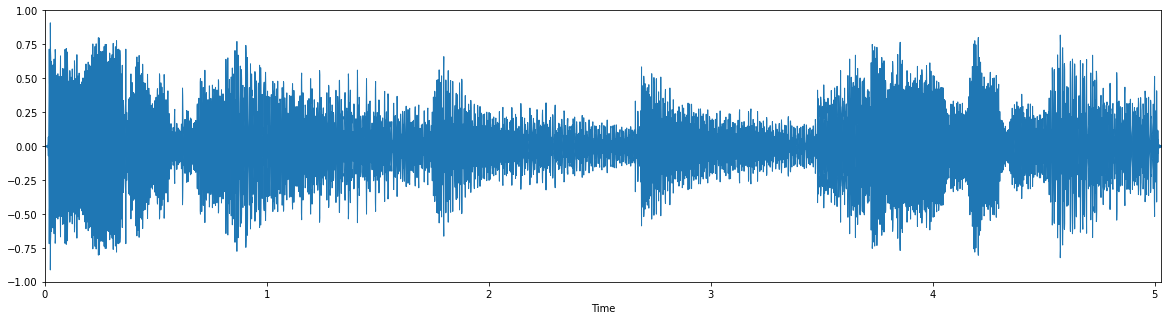

In [4]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

> Ref: https://levelup.gitconnected.com/audio-data-analysis-using-deep-learning-part-1-7f6e08803f60

## Spectrogram

Spectrogram visualises **strength of frequencies**, usually depicted as heatmap.

Short term Fourier transform: amplitude of given frequency at a time

In [5]:
amplitude = librosa.stft(x)
decibel = librosa.amplitude_to_db(abs(amplitude))

decibel.shape

(1025, 434)

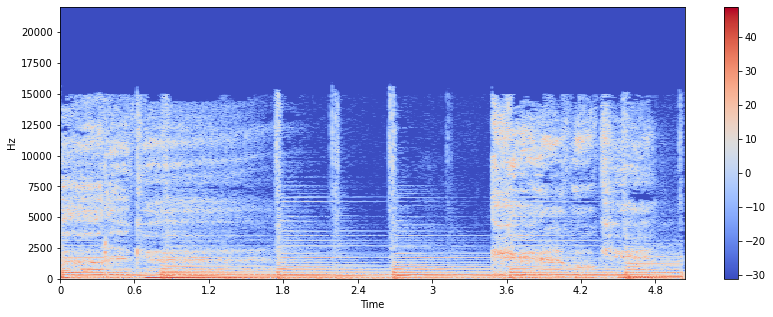

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(decibel, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Log spectrogram

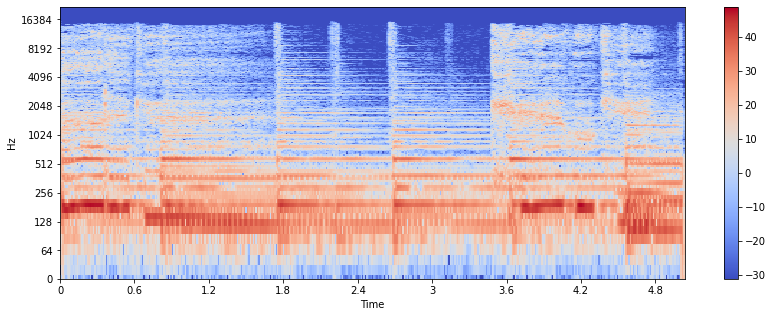

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(decibel, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Spectral features

Frequency-based, convert time-based signal into frequency domain using Fourier transform, including **spectral centroid**, **spectral flux**, **spectral density**, **spectral roll-off**

## Spectral centroid

Indicate where the center of mass of sound, the frequency at which the energy of a spectrum is centered upon

$$f_c=\frac{\sum_k S(k)f(k)}{\sum_k S(k)}$$

- $S(k)$: spectral magnitude at frequency bin $k$
- $f(k)$: frequency at bin $k$

In [8]:
spectral_centroid = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroid.shape

(434,)

In [9]:
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames)
t.shape

(434,)

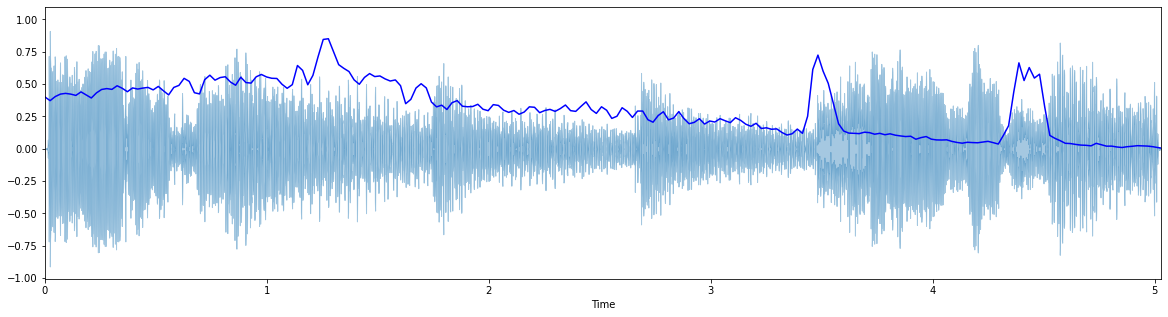

In [10]:
from sklearn.preprocessing import minmax_scale

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, minmax_scale(spectral_centroid), color='b')

## Spectral roll-off

Shape of the signal, represents the frequency at which high frequencies decline to 0.
To obtain, calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

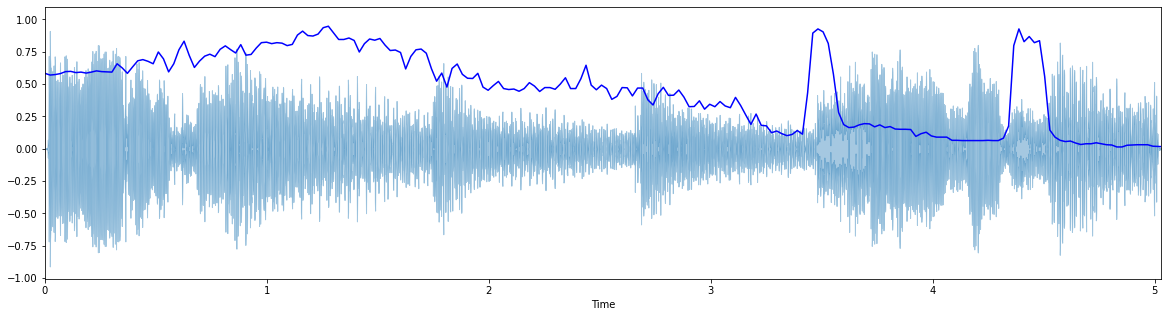

In [11]:
spectral_rolloff = librosa.feature.spectral_rolloff(x + 0.01, sr=sr)[0]

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, minmax_scale(spectral_rolloff), color='b')

## Spectral bandwidth

Width of the band of light at one-half the peak maximum

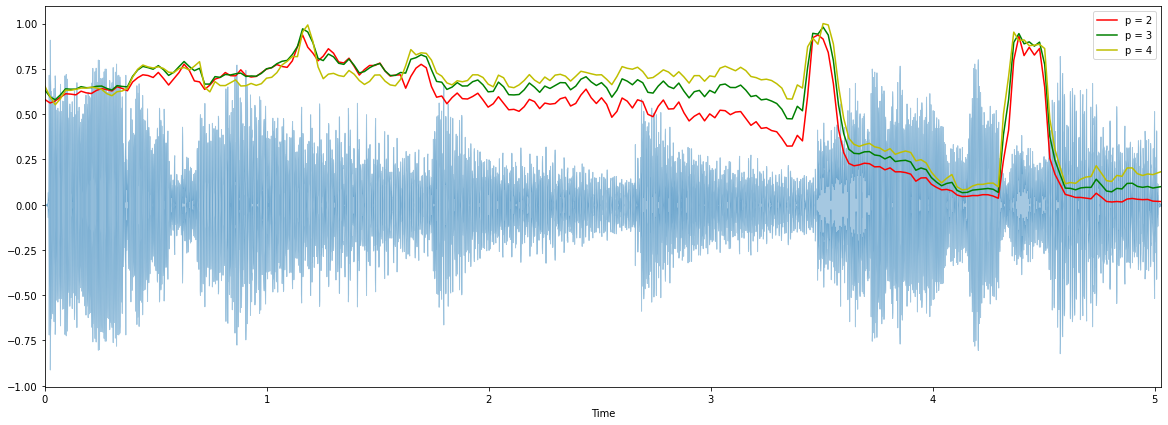

In [14]:
power_2 = librosa.feature.spectral_bandwidth(x + 0.01, sr=sr, p=2)[0]
power_3 = librosa.feature.spectral_bandwidth(x + 0.01, sr=sr, p=3)[0]
power_4 = librosa.feature.spectral_bandwidth(x + 0.01, sr=sr, p=4)[0]

plt.figure(figsize=(20, 7))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, minmax_scale(power_2), color='r')
plt.plot(t, minmax_scale(power_3), color='g')
plt.plot(t, minmax_scale(power_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## Zero-crossing rate

Smoothness of signal, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second. Usually has higher values for highly percussive sounds like metal and rock.

In [15]:
zero_crossing = librosa.zero_crossings(x, pad=False)
sum(zero_crossing)

8979

## Mel-Frequency Cepstral Coefficients (MFCCs)

Small set of features describing the overall shape of a spectral envelope. It models the characteristics of the human voice.

(20, 434)


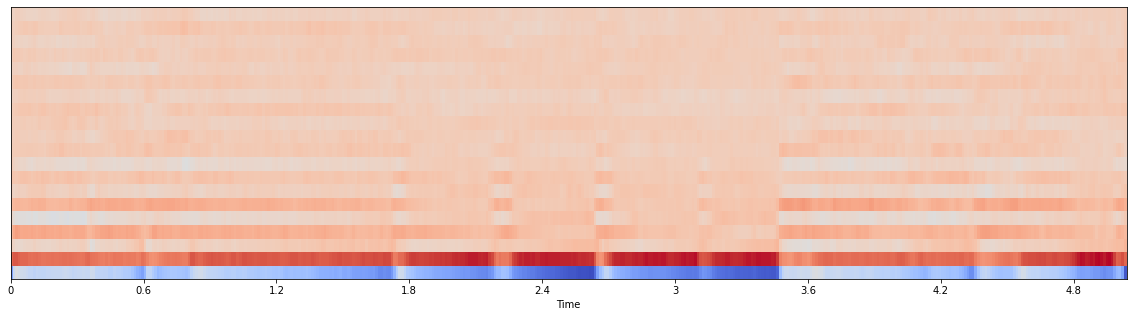

In [17]:
mfcc = librosa.feature.mfcc(x, sr=sr)
print(mfcc.shape)

plt.figure(figsize=(20, 5))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')

## Chroma feature

12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal.

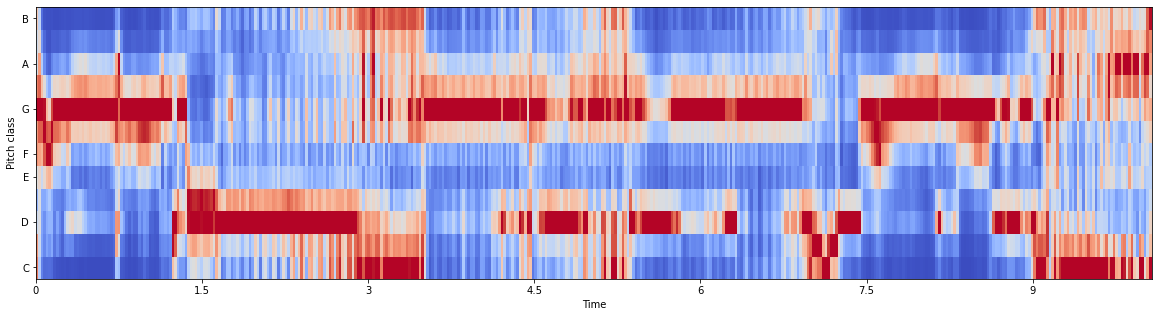

In [18]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=512)

plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')